# Reading and plotting data from WRF-PartMC netCDF file

In [2]:
import numpy as np
from netCDF4 import Dataset
import cartopy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import wrf

In [3]:
def apply_map_features(axes):
    ''' Adds map features '''
    axes.coastlines(resolution='50m', color='black', linewidth=1)
    states_provinces = cartopy.feature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    axes.add_feature(states_provinces, edgecolor='black')
    
    return

In [4]:
# Load netcdf file
data_dir = './'
wrf_filename = '%straining.nc' % data_dir
ncf = Dataset(wrf_filename, "r", format="NETCDF4")

In [5]:
# WRF map projection
cart_proj = cartopy.crs.LambertConformal(central_longitude=-97,central_latitude=38)
# Data projection
data_proj = cartopy.crs.PlateCarree()

In [6]:
# Static data
lats = ncf.variables['XLAT'][0,:,:]
lons = ncf.variables['XLONG'][0,:,:]

In [7]:
i_time = -1 # Scecify output time to plot
i_z = 0 # Specify level to plot

### Plot ozone mixing ratio

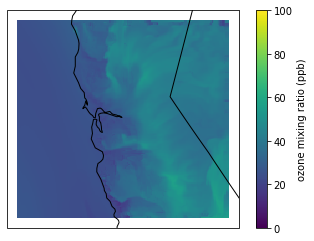

In [8]:
fig = plt.figure()
axes = fig.add_subplot(projection=cart_proj)
data = ncf.variables['o3']

norm = colors.Normalize(0,100)
c = axes.pcolormesh(lons,lats,data[i_time,i_z,:,:],
                       norm=norm,transform=data_proj)

apply_map_features(axes)
cbar = fig.colorbar(c)
cbar.set_label('ozone mixing ratio (ppb)')
fig.savefig('example_gas.pdf');

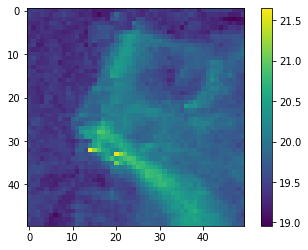

In [9]:
data = ncf.variables['TOT_NUM_CONC'][:]
plt.imshow(np.log(data[i_time,i_z,50:100,50:100]))
plt.colorbar()
plt.savefig('a.png')

### Plot aerosol number concentration

TypeError: Dimensions of C (50, 50) are incompatible with X (169) and/or Y (159); see help(pcolormesh)

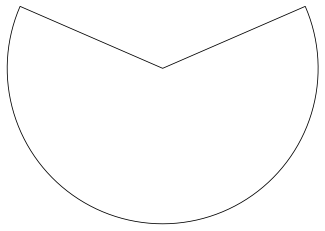

In [10]:
fig = plt.figure()
axes = fig.add_subplot(projection=cart_proj)
data = ncf.variables['TOT_NUM_CONC'][:]

norm = colors.LogNorm(1e6,1e9)
c = axes.pcolormesh(lons,lats,data[i_time,i_z,50:100,50:100],
                       norm=norm,transform=data_proj)

apply_map_features(axes)
cbar = fig.colorbar(c)
cbar.set_label('number concentration (# m$^{-3}$)')
fig.savefig('example_aerosols.pdf');

In [49]:
(nt,nz,ny,nx) = data.shape

In [61]:
varname = "TOT_NUM_CONC"

def make_animation(varname):
    ds = ncf.variables[varname]
    fig = plt.figure()
    axes = fig.add_subplot(projection=cart_proj)
    name = ds.description
    units = ds.units
    data = ds[:]

    i_time = 0
    norm = colors.LogNorm( data.min(), data.max())
    c = axes.pcolormesh(lons,lats,data[i_time,i_z,:,:],
                           norm=norm,transform=data_proj)

    apply_map_features(axes)
    cbar = fig.colorbar(c)
    cbar.set_label(f'{name} ({units})')

    def animate(i):
        c.set_array(data[i,i_z,:,:].ravel())
        return c

    anim = FuncAnimation(fig, animate, frames=nt, interval=50)
    anim.save(f'{varname}.gif')
# fig.savefig('example_aerosols.pdf');

<class 'netCDF4._netCDF4.Variable'>
float32 TOT_NUM_CONC(Time, bottom_top, south_north, west_east)
    FieldType: 104
    MemoryOrder: XYZ
    description: total number concentration
    units: 
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (133, 39, 159, 169)
filling on, default _FillValue of 9.969209968386869e+36 used

MovieWriter ffmpeg unavailable; using Pillow instead.


In [33]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [42]:
fig, ax = plt.subplots()
line, = ax.plot([])     # A tuple unpacking to unpack the only plot
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)

x = np.linspace(0,2*3.14, 100)
def animate(frame_num):
    y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x, y))
    return line

anim = FuncAnimation(fig, animate, frames=100, interval=20)
# plt.show()

<IPython.core.display.Javascript object>

(16268106.0, 11874858000.0)

### Selecting range of data

It will be necessary to exclude some of the data from the dataset. In particular, removing horizontal boundary conditions (domain edges).

In [12]:
(nt,nz,ny,nx) = data.shape
print(nt,nz,ny,nx)

x_s = 1
x_e = nx-1
y_s = 1
y_e = ny-1
z_s = 0
z_e = nz
t_s = 0
t_e = nt
print(data[t_s:t_e,z_s:z_e,y_s:y_e,x_s:x_e].shape)

133 39 159 169
(133, 39, 157, 167)


In [13]:
ncf.close() # Close netcdf file

In [14]:
import numpy as np

In [20]:
with open('x_gases.txt', 'r') as f:
    gases = f.read().splitlines() 

with open('x_aerosols.txt', 'r') as f:
    aerosols = f.read().splitlines() 

In [21]:
aerosols

['TOT_NUM_CONC',
 'TOT_MASS_CONC',
 'pmc_SO4',
 'pmc_NO3',
 'pmc_Cl',
 'pmc_NH4',
 'pmc_ARO1',
 'pmc_ARO2',
 'pmc_ALK1',
 'pmc_OLE1',
 'pmc_API1',
 'pmc_API2',
 'pmc_LIM1',
 'pmc_LIM2',
 'pmc_OC',
 'pmc_BC',
 'pmc_H2O']

In [22]:
gases

['h2so4',
 'hno3',
 'hcl',
 'nh3',
 'no',
 'no2',
 'no3',
 'n2o5',
 'hono',
 'hno4',
 'o3',
 'o1d',
 'O3P',
 'oh',
 'ho2',
 'h2o2',
 'co',
 'so2',
 'ch4',
 'c2h6',
 'ch3o2',
 'ethp',
 'hcho',
 'ch3oh',
 'ANOL',
 'ch3ooh',
 'ETHOOH',
 'ald2',
 'hcooh',
 'RCOOH',
 'c2o3',
 'pan',
 'aro1',
 'aro2',
 'alk1',
 'ole1',
 'api1',
 'api2',
 'lim1',
 'lim2',
 'par',
 'AONE',
 'mgly',
 'eth',
 'OLET',
 'OLEI',
 'tol',
 'xyl',
 'cres',
 'to2',
 'cro',
 'open',
 'onit',
 'rooh',
 'ro2',
 'ano2',
 'nap',
 'xo2',
 'xpar',
 'isop',
 'isoprd',
 'isopp',
 'isopn',
 'isopo2',
 'api',
 'lim',
 'dms',
 'msa',
 'dmso',
 'dmso2',
 'ch3so2h',
 'ch3sch2oo',
 'ch3so2',
 'ch3so3',
 'ch3so2oo',
 'ch3so2ch2oo',
 'SULFHOX']

In [26]:
target_cols = ['ccn_001',
 'ccn_003',
 'ccn_006',
 'CHI',
 'CHI_CCN',
 'D_ALPHA',
 'D_GAMMA',
 'D_ALPHA_CCN',
 'D_GAMMA_CCN',
 'PM25']

In [62]:
make_animation("PM25")

<IPython.core.display.Javascript object>

MovieWriter ffmpeg unavailable; using Pillow instead.


In [23]:
# Load netcdf file
data_dir = './'
wrf_filename = '%straining.nc' % data_dir
ncf = Dataset(wrf_filename, "r", format="NETCDF4")

In [25]:
ncf.variables['SULFHOX']

<class 'netCDF4._netCDF4.Variable'>
float32 SULFHOX(Time, bottom_top, south_north, west_east)
    FieldType: 104
    MemoryOrder: XYZ
    description: SULFHOX mixing ratio
    units: ppbv
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (133, 39, 159, 169)
filling on, default _FillValue of 9.969209968386869e+36 used

# Look for temporal dependence?

In [63]:
N = nx*ny*nz*nt

In [64]:
N

139379877

In [65]:
import torch

In [67]:
import sklearn

In [76]:
np.log(ncf.variables['PM25'][:1,...]).mean(), np.log(ncf.variables['PM25'][:1,...]).std()

(-22.5717287438846, 1.0528057044112848)

In [83]:
plt.hist(np.log(ncf.variables['isoprd'][:1,...].flatten()))
plt.savefig('isoprd.png')

<IPython.core.display.Javascript object>

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

In [86]:
nx,ny,nz

(169, 159, 39)

In [95]:
50*50*39*nt/10

1296750.0

In [190]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

def log_transform(x):
    print(x)
    return np.log(x + 1)


scaler = StandardScaler()
transformer = FunctionTransformer(np.log, inverse_func=np.exp)
gbr = GradientBoostingRegressor(n_estimators=100)

lr = 
pipe = Pipeline(steps=[('transformer', transformer),('scaler', scaler), ("GBR",gbr ) ])


In [216]:
tidx = 11
data = ncf.variables['h2so4'][:]
X = data[tidx,:,:,:].flatten()

data = ncf.variables['TOT_NUM_CONC'][:]
Y = data[tidx,:,:,:].flatten()

data = ncf.variables['PM25'][:]
pred = np.log(data[tidx,:,:,:].flatten())

In [217]:
tmp = np.vstack((X, Y)).transpose()

In [218]:
x_train, x_test, y_train, y_test= sklearn.model_selection.train_test_split(tmp, pred, test_size=0.3, random_state=3)

In [219]:
pipe.fit(x_train, y_train)

/home/kwoksun2/.conda/envs/torch/lib/python3.9/site-packages/sklearn/preprocessing/_function_transformer.py:137: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


Pipeline(steps=[('transformer',
                 FunctionTransformer(func=<ufunc 'log'>,
                                     inverse_func=<ufunc 'exp'>)),
                ('scaler', StandardScaler()),
                ('GBR', GradientBoostingRegressor())])

In [ ]:
ncf.variables['h2so4'][:]/ncf.variables['TOT_NUM_CONC'][:]

<class 'netCDF4._netCDF4.Variable'>
float32 TOT_NUM_CONC(Time, bottom_top, south_north, west_east)
    FieldType: 104
    MemoryOrder: XYZ
    description: total number concentration
    units: 
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (133, 39, 159, 169)
filling on, default _FillValue of 9.969209968386869e+36 used

In [220]:
ytrain_pred = pipe.predict(x_test)

In [221]:
plt.scatter(y_test, ytrain_pred,alpha=0.3)
plt.axline((-20,-20),slope=1, color='C1')
plt.savefig('aaa.png')

<IPython.core.display.Javascript object>

In [222]:
pipe.score(x_train, y_train)

0.8712527629776662

In [223]:
pipe.score(x_test, y_test)

0.8696735341167424

In [142]:
z = pipe.transform(tmp)

In [145]:
plt.hist(z[:,1])
plt.savefig('log_transform.png')

<IPython.core.display.Javascript object>

In [126]:
plt.hist(pipe.inverse_transform(z))

<IPython.core.display.Javascript object>

(array([1.11010e+04, 2.13000e+02, 2.62900e+03, 2.04500e+04, 3.48670e+04,
        7.39010e+04, 9.87390e+04, 3.64961e+05, 2.77816e+05, 1.63292e+05]),
 array([-36.841362 , -33.696537 , -30.551712 , -27.406885 , -24.26206  ,
        -21.117235 , -17.972408 , -14.827583 , -11.682758 ,  -8.537933 ,
         -5.3931074], dtype=float32),
 <BarContainer object of 10 artists>)